In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10)
pd.options.display.max_rows = 200
pd.options.display.max_seq_items = 2000

In [3]:
os.chdir(r"C:\Users\jadel\Documents\OpenClassrooms\Projet 2")

In [4]:
df = pd.read_csv("en.openfoodfacts.org.products.csv", sep = '\t')

C:\Users\jadel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,13,19,20,21,22,23,27,28,29,31,32,40,41,42,52,55,64,66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.shape

(2029762, 187)

In [6]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
#nous supprimons les doublons ayant le même code en gardant celui dont la modification est la plus récente. 
df = df.drop(df[df.sort_values(by='last_modified_t').duplicated(subset = ['code'], keep = 'first')].index, axis = 0)

<ipython-input-7-5c9c48348695>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[df.sort_values(by='last_modified_t').duplicated(subset = ['code'], keep = 'first')].index, axis = 0)


In [8]:
#nous vérifions s'il reste encore des doublons
df.duplicated(subset = ['code']).sum()

0

In [9]:
#suppression des lignes sans les valeurs sur les calories et les proteines
df = df.dropna(axis = 0, how = 'any', subset = ['product_name','energy-kcal_100g','proteins_100g', 'nutriscore_grade'])

In [10]:
#on ne retient que les produits vendus en France
df = df[df['countries'].str.contains("Fr|fr")==True]
df['countries'].value_counts()[:100]

France                               193036
en:fr                                 28785
en:france                             10023
Francia,España                         5231
en:France                              2200
France, United States                  1898
Frankreich,Deutschland                 1775
Belgique,France                        1318
Francia                                1224
France,Spain                           1216
Belgique, France                       1108
France,en:france                       1103
France,Suisse                          1074
Francia, Spain                          985
France, en:belgium                      900
France, Suisse                          900
France,United Kingdom                   765
Frankreich                              709
France,Switzerland                      655
France, Italy                           654
Belgium,France                          652
France,Germany                          618
en:france, United States        

In [11]:
#nous avons déjà écarté près de 85% des lignes en ne retenant que celles qui sont exploitables 
df.shape

(281422, 187)

In [12]:
#on ne retient que les colonnes avec moins de 20% de Nan
cols_1 = [col for col in df.columns if df[col].isna().mean()<0.2]

In [13]:
df = df[cols_1]

In [14]:
#rien qu'en supprimant les colonnes inexploitables nous passons de 187 à 37 colonnes
df.shape

(281422, 37)

In [15]:
#les colonnes pnns_groups_1 et pnns_groups_2 semblent avoir le nombre le plus pertinent de valeurs différentes
print("La colonne 'categories' contient ",df['categories'].nunique(), "valeurs différentes")
print("La colonne 'pnns_groups_1' contient ",df['pnns_groups_1'].nunique(), "valeurs différentes")
print("La colonne 'pnns_groups_2' contient ",df['pnns_groups_2'].nunique(), "valeurs différentes")
print("La colonne 'main_category' contient ",df['main_category'].nunique(), "valeurs différentes")
print("La colonne 'main_category_en' contient ",df['categories_en'].nunique(), "valeurs différentes")

La colonne 'categories' contient  46737 valeurs différentes
La colonne 'pnns_groups_1' contient  11 valeurs différentes
La colonne 'pnns_groups_2' contient  40 valeurs différentes
La colonne 'main_category' contient  13935 valeurs différentes
La colonne 'main_category_en' contient  34107 valeurs différentes


<BarContainer object of 40 artists>

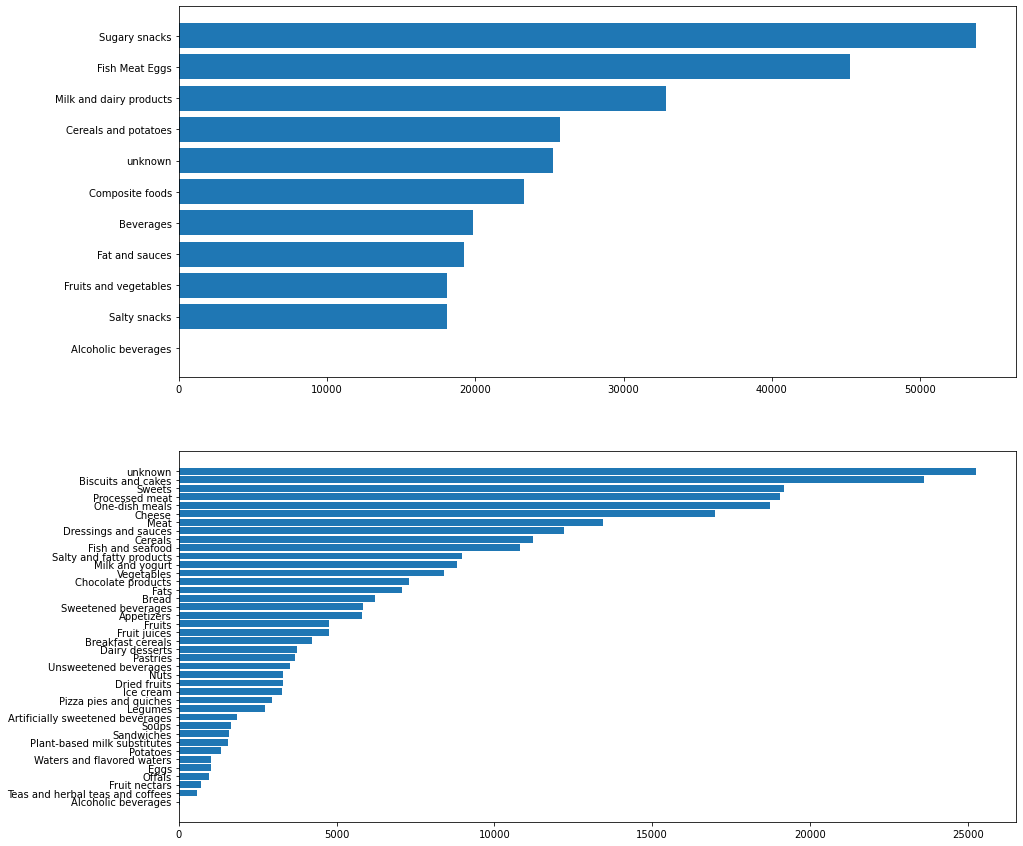

In [16]:
plt.figure(figsize = (15,15))
plt.subplot(211)
plt.barh(list(df['pnns_groups_1'].value_counts(ascending = True).index), df['pnns_groups_1'].value_counts(ascending = True))
plt.subplot(212)
plt.barh(list(df['pnns_groups_2'].value_counts(ascending = True).index), df['pnns_groups_2'].value_counts(ascending = True))

In [17]:
#nous renommons ces deux colonnes
df = df.rename({'pnns_groups_1': 'category_1', 'pnns_groups_2': 'category_2'}, axis=1) 

In [18]:
#nous supprimons les lignes avec une catégorie inconnue
df = df.drop(df[df['category_1']=='unknown'].index)

In [19]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'categories', 'categories_tags', 'categories_en', 'countries',
       'countries_tags', 'countries_en', 'nutriscore_score',
       'nutriscore_grade', 'category_1', 'category_2', 'states', 'states_tags',
       'states_en', 'main_category', 'main_category_en', 'image_url',
       'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [20]:
#liste des colonnes que l'on souhaite exploiter
cols_2 = ['code','product_name', 'countries',
          'nutriscore_grade', 'category_1', 'category_2',
          'energy-kcal_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g']

In [21]:
df = df[cols_2]

In [22]:
df.head()

,code,product_name,countries,nutriscore_grade,category_1,category_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
18,0000000000949,Salade de carottes râpées,France,b,Composite foods,One-dish meals,32.0,0.3,0.1,5.3,3.9,0.9,0.42
27,0000000001281,Tarte noix de coco,France,d,Sugary snacks,Biscuits and cakes,381.0,22.0,15.5,27.3,21.9,4.6,0.10
37,0000000001885,Compote de poire,France,a,Fruits and vegetables,Fruits,157.0,0.0,0.0,36.0,27.0,0.6,0.00
41,0000000002257,Salade de macedoine de légumes,France,b,Composite foods,One-dish meals,143.0,12.7,1.0,3.9,1.0,1.9,0.27
68,0000000005005,Abondance,France,d,Milk and dairy products,Cheese,397.0,33.0,21.6,0.1,0.1,25.0,1.30


In [23]:
#suppression des valeurs aberrantes
df = df.drop(df[(df['energy-kcal_100g']>1000) |
   (df['fat_100g']>100) |
   (df['saturated-fat_100g']>100) |
   (df['carbohydrates_100g']>100) |
   (df['sugars_100g']>100) |
   (df['proteins_100g']>100) |
   (df['salt_100g']>100) ].index)

In [24]:
#suppression des produits dont la valeur calorique est abérrante par rapport aux macronutriments
df = df.drop(df[df['energy-kcal_100g']<(df['carbohydrates_100g']*3+df['fat_100g']*7+df['proteins_100g']*3)].index)

In [25]:
df.isna().sum()
#il y a un nombre relativement faible de valeurs manquantes.
#Nous pouvons les supprimer car cela aura un impact insignifiant sur la taille de l'échantillon.

code                   0
product_name           0
countries              0
nutriscore_grade       0
category_1             0
category_2             0
energy-kcal_100g       0
fat_100g               4
saturated-fat_100g     4
carbohydrates_100g    92
sugars_100g            6
proteins_100g          0
salt_100g             65
dtype: int64

In [26]:
df = df.dropna()

In [27]:
#on vérifie qu'il n'y a plus de valeurs manquantes
df.isna().sum().sum()

0

In [28]:
df.shape
#après le nettoyage nous gardons environ 15% des lignes initiales

(250211, 13)

In [29]:
df.to_csv('openfoodfacts_clean.csv', index = False)

In [30]:
df.head()

,code,product_name,countries,nutriscore_grade,category_1,category_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
18,0000000000949,Salade de carottes râpées,France,b,Composite foods,One-dish meals,32.0,0.3,0.1,5.3,3.9,0.9,0.42
27,0000000001281,Tarte noix de coco,France,d,Sugary snacks,Biscuits and cakes,381.0,22.0,15.5,27.3,21.9,4.6,0.10
37,0000000001885,Compote de poire,France,a,Fruits and vegetables,Fruits,157.0,0.0,0.0,36.0,27.0,0.6,0.00
41,0000000002257,Salade de macedoine de légumes,France,b,Composite foods,One-dish meals,143.0,12.7,1.0,3.9,1.0,1.9,0.27
68,0000000005005,Abondance,France,d,Milk and dairy products,Cheese,397.0,33.0,21.6,0.1,0.1,25.0,1.30
